In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers:
    layer.trainable = False
model_tl = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model_tl.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_tl = model_tl.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 18s 18ms/step - loss: 2.0923 - accuracy: 0.2399 - val_loss: 1.9509 - val_accuracy: 0.2913
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 1.9066 - accuracy: 0.3075 - val_loss: 1.8959 - val_accuracy: 0.3114
Epoch 3/10
625/625 [==============================] - 9s 14ms/step - loss: 1.8506 - accuracy: 0.3300 - val_loss: 1.8175 - val_accuracy: 0.3407
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 1.8052 - accuracy: 0.3469 - val_loss: 1.8113 - val_accuracy: 0.3548
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 1.7880 - accuracy: 0.3542 - val_loss: 1.7569 - val_accuracy: 0.3655
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 1.7720 - accuracy: 0.3603 - val_loss: 1.7333 - val_accuracy: 0.3815
Epoch 7/10
625/625 [==============================] - 12s 19ms/step - loss: 1.7476 - accuracy: 0.3726 - val_loss: 1.7703 - val_accuracy: 0.3

In [ ]:
base_model.trainable = True
model_ft = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model_ft.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_ft = model_ft.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 66s 53ms/step - loss: 1.2115 - accuracy: 0.5955 - val_loss: 3.2213 - val_accuracy: 0.1034
Epoch 2/10
625/625 [==============================] - 32s 51ms/step - loss: 0.8493 - accuracy: 0.7177 - val_loss: 0.9528 - val_accuracy: 0.6736
Epoch 3/10
625/625 [==============================] - 31s 50ms/step - loss: 0.6798 - accuracy: 0.7715 - val_loss: 1.0396 - val_accuracy: 0.6747
Epoch 4/10
625/625 [==============================] - 32s 52ms/step - loss: 0.6103 - accuracy: 0.7965 - val_loss: 1.1109 - val_accuracy: 0.6477
Epoch 5/10
625/625 [==============================] - 33s 53ms/step - loss: 0.5127 - accuracy: 0.8292 - val_loss: 0.7698 - val_accuracy: 0.7492
Epoch 6/10
625/625 [==============================] - 33s 52ms/step - loss: 0.4506 - accuracy: 0.8515 - val_loss: 1.0426 - val_accuracy: 0.6862
Epoch 7/10
625/625 [==============================] - 32s 51ms/step - loss: 0.3874 - accuracy: 0.8711 - val_loss: 0.7358 - val_accuracy:

In [ ]:
loss_tl, acc_tl = model_tl.evaluate(x_test, y_test, verbose=0)
loss_ft, acc_ft = model_ft.evaluate(x_test, y_test, verbose=0)


In [ ]:
print("Transfer Learning Model Accuracy:", acc_tl)
print("Fine-tuned Model Accuracy:", acc_ft)

Transfer Learning Model Accuracy: 0.12770000100135803
Fine-tuned Model Accuracy: 0.7476999759674072


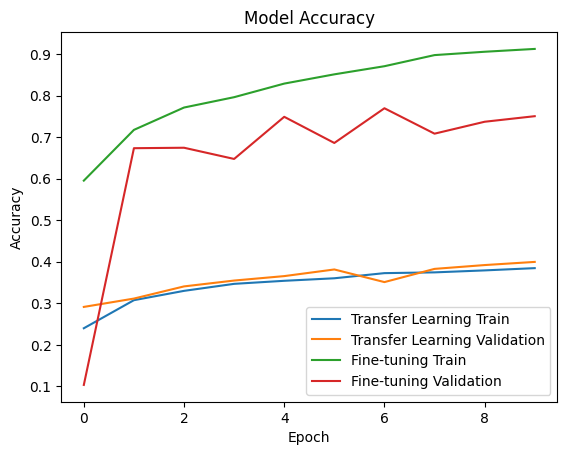

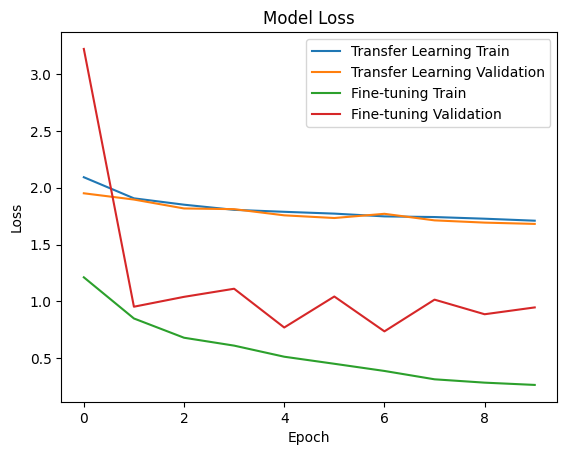

In [ ]:
# Plot Training & Validation Accuracy
plt.plot(history_tl.history['accuracy'])
plt.plot(history_tl.history['val_accuracy'])
plt.plot(history_ft.history['accuracy'])
plt.plot(history_ft.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Transfer Learning Train', 'Transfer Learning Validation', 'Fine-tuning Train', 'Fine-tuning Validation'], loc='lower right')
plt.show()

# Plot Training & Validation Loss
plt.plot(history_tl.history['loss'])
plt.plot(history_tl.history['val_loss'])
plt.plot(history_ft.history['loss'])
plt.plot(history_ft.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Transfer Learning Train', 'Transfer Learning Validation', 'Fine-tuning Train', 'Fine-tuning Validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
y_test_single = np.argmax(y_test, axis=1)
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Use np.argmax instead of tf.argmax
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='macro')
    recall = recall_score(y_test, y_pred_classes, average='macro')
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = evaluate_model(model_ft, x_test, y_test_single)


313/313 [==============================] - 4s 12ms/step


In [ ]:
print("Transfer Learning Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Transfer Learning Model:
Accuracy: 0.7477
Precision: 0.771027181327841
Recall: 0.7476999999999999
F1 Score: 0.7499143328237686


**CIFAR-10 Dataset:**
CIFAR-10 is a widely used benchmark dataset for image classification tasks. It consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The classes include common objects such as airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks. CIFAR-10 is often used for training and evaluating machine learning models, particularly in the field of computer vision.

**ResNet50:**
ResNet50 is a deep convolutional neural network architecture introduced by Microsoft Research in 2015. It is part of the ResNet (Residual Network) family and is specifically designed for image recognition tasks. ResNet50 consists of 50 layers and has demonstrated superior performance on various image classification benchmarks. The key innovation in ResNet is the introduction of skip connections or residual connections, which alleviate the vanishing gradient problem and enable training of very deep neural networks.

**Transfer Learning:![download.png](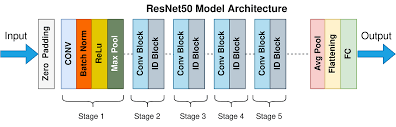![download.png](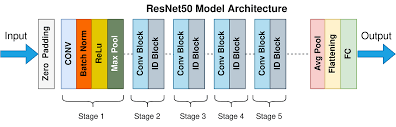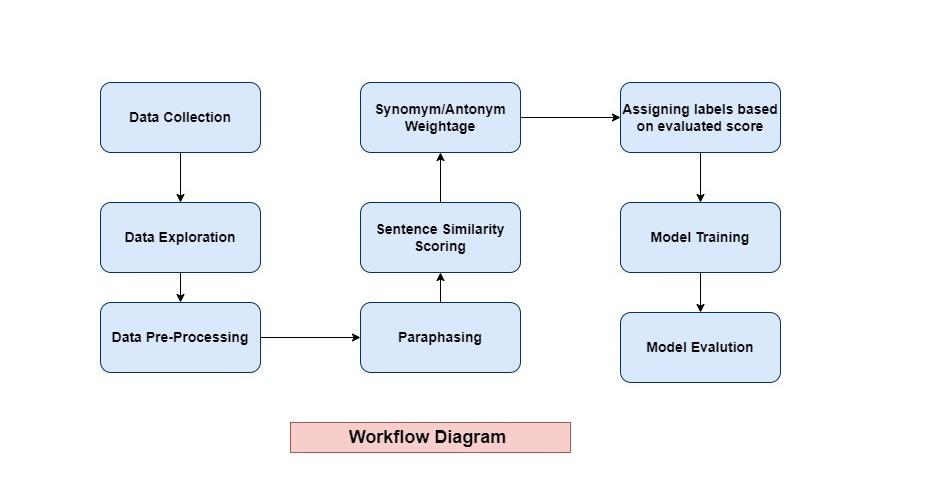))**
Transfer learning is a technique in machine learning where a model trained on one task is reused as the starting point for a model on a second related task. It is particularly useful when the amount of labeled data for the target task is limited. In this example, we performed transfer learning using the ResNet50 model pretrained on the ImageNet dataset. We leveraged the features learned by ResNet50 on ImageNet and fine-tuned the model on the CIFAR-10 dataset. By freezing the initial layers of ResNet50 and only training the additional layers we added, we were able to adapt the model to the CIFAR-10 dataset, achieving good performance with less computational resources and training data compared to training from scratch. Transfer learning allows us to take advantage of pre-existing knowledge learned from large datasets and apply it to new tasks, speeding up the training process and potentially improving generalization performance.